In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from scipy import misc
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle
import matplotlib.image as mpimg

In [2]:
%matplotlib inline

In [3]:
cats_dict = { 'bargraph': 1 , 'equations':2, 'flowchart':3, 'geometry':4, 'linegraph':5, 'maps':6 , 'piegraphs':7, 'scatterplot':8, 'tables':9, 'venndiagram':10}

In [4]:
root_test = 'Testdataset3/'
root_train = 'Traindataset3/'

train_folders = [os.path.join(root_train, d) for d in sorted(os.listdir(root_train)) if os.path.isdir(os.path.join(root_train, d))]
test_folders = [os.path.join(root_test, d) for d in sorted(os.listdir(root_test)) if os.path.isdir(os.path.join(root_test, d))]

In [26]:
train_folders

image_files = [os.path.join('Traindataset2/bargraph/', d) for d in sorted(os.listdir('Traindataset2/bargraph/')) if d != '.DS_Store']
dataset = np.ndarray(shape=(len(image_files), image_size, image_size ),
                         dtype=np.float32)
print('Traindataset2/bargraph/')
num_images = 0
for image in image_files:
#image_file = os.path.join(folder, image)
    print(image)
    try:
      image_data = (ndimage.imread(image, mode = 'F').astype(float) ) / pixel_depth
      print(np.amax(image_data))
      #if image_data.shape != (image_size, image_size, 3):
       # image_data = (ndimage.imread(image, mode = 'RGB').astype(float) - 
        #            pixel_depth / 2) / pixel_depth 
      if image_data.shape != (image_size, image_size ):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image, ':', e, '- it\'s ok, skipping.')    

Traindataset2/bargraph/
Traindataset2/bargraph/p_103_RevisBargraph.gif
1.0
Traindataset2/bargraph/p_104_RevisBargraph.GIF
0.996078431373
Traindataset2/bargraph/p_105_RevisBargraph.GIF
0.996078431373
Traindataset2/bargraph/p_106_RevisBargraph.PNG
1.0
Traindataset2/bargraph/p_107_RevisBargraph.PNG
1.0
Traindataset2/bargraph/p_108_RevisBargraph.PNG
1.0
Traindataset2/bargraph/p_110_RevisBargraph.png
1.0
Traindataset2/bargraph/p_111_RevisBargraph.gif
1.0
Traindataset2/bargraph/p_112_RevisBargraph.gif
0.976152966069
Traindataset2/bargraph/p_113_RevisBargraph.gif
0.976152966069
Traindataset2/bargraph/p_114_RevisBargraph.gif
0.828447050207
Traindataset2/bargraph/p_115_RevisBargraph.gif
0.862745098039
Traindataset2/bargraph/p_118_RevisBargraph.gif
0.668792186064
Traindataset2/bargraph/p_125_RevisBargraph.gif
0.996078431373
Traindataset2/bargraph/p_129_RevisBargraph.gif
0.992156862745
Traindataset2/bargraph/p_130_RevisBargraph.jpg
1.0
Traindataset2/bargraph/p_135_RevisBargraph.gif
0.995082361558

In [27]:
print(np.amax(dataset))

1.0


In [7]:
image_size = 100  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = [os.path.join(folder, d) for d in sorted(os.listdir(folder)) if d != '.DS_Store']
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size ),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    #image_file = os.path.join(folder, image)
    print(image)
    try:
      image_data = (ndimage.imread(image, mode = 'F').astype(float) ) / pixel_depth
      #if image_data.shape != (image_size, image_size, 3):
       # image_data = (ndimage.imread(image, mode = 'RGB').astype(float) - 
        #            pixel_depth / 2) / pixel_depth 
      if image_data.shape != (image_size, image_size ):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset
        
def maybe_pickle(data_folders, min_num_images_per_class, force=True):
  dataset_names = []
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s' % set_filename)
      dataset = load_letter(folder, min_num_images_per_class)
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names

train_datasets = maybe_pickle(train_folders, 80)
test_datasets = maybe_pickle(test_folders, 20)

Pickling Traindataset3/bargraph.pickle
Traindataset3/bargraph
Traindataset3/bargraph/103_RevisBargraph.gif
Traindataset3/bargraph/105_RevisBargraph.GIF
Traindataset3/bargraph/106_RevisBargraph.PNG
Traindataset3/bargraph/107_RevisBargraph.PNG
Traindataset3/bargraph/108_RevisBargraph.PNG
Traindataset3/bargraph/10_RevisBargraph.gif
Traindataset3/bargraph/110_RevisBargraph.png
Traindataset3/bargraph/112_RevisBargraph.gif
Traindataset3/bargraph/113_RevisBargraph.gif
Traindataset3/bargraph/114_RevisBargraph.gif
Traindataset3/bargraph/115_RevisBargraph.gif
Traindataset3/bargraph/118_RevisBargraph.gif
Traindataset3/bargraph/11_BarChart.jpg
Traindataset3/bargraph/129_RevisBargraph.gif
Traindataset3/bargraph/12_RevisBargraph.gif
Traindataset3/bargraph/130_RevisBargraph.jpg
Traindataset3/bargraph/135_RevisBargraph.gif
Traindataset3/bargraph/136_RevisBargraph.gif
Traindataset3/bargraph/139_RevisBargraph.jpg
Traindataset3/bargraph/13_BarChart.jpg
Traindataset3/bargraph/13_RevisBargraph.png
Traindat

In [8]:
train_datasets

['Traindataset3/bargraph.pickle',
 'Traindataset3/equations.pickle',
 'Traindataset3/flowchart.pickle',
 'Traindataset3/geometry.pickle',
 'Traindataset3/linegraph.pickle',
 'Traindataset3/maps.pickle',
 'Traindataset3/piegraphs.pickle',
 'Traindataset3/scatterplot.pickle',
 'Traindataset3/tables.pickle',
 'Traindataset3/venndiagram.pickle']

In [13]:
train_datasets = [
 'Traindataset3/flowchart.pickle',
 'Traindataset3/geometry.pickle',
 'Traindataset3/piegraphs.pickle',
 'Traindataset3/scatterplot.pickle',
 'Traindataset3/venndiagram.pickle']

test_datasets = [
  'Testdataset3/flowchart.pickle',
 'Testdataset3/geometry.pickle',
 'Testdataset3/piegraphs.pickle',
 'Testdataset3/scatterplot.pickle',
 'Testdataset3/venndiagram.pickle']  

train_datasets2 = [
 'Traindataset3/bargraph.pickle',
 'Traindataset3/equations.pickle',
 'Traindataset3/linegraph.pickle',
 'Traindataset3/maps.pickle',
 'Traindataset3/tables.pickle' ]

test_datasets2 = [
 'Testdataset3/bargraph.pickle',
 'Testdataset3/equations.pickle',
 'Testdataset3/linegraph.pickle',
 'Testdataset3/maps.pickle',
 'Testdataset3/tables.pickle'] 

In [14]:
def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.float32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size, valid_size=0):
  num_classes = len(pickle_files)
  valid_dataset, valid_labels = make_arrays(valid_size, image_size)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  vsize_per_class = valid_size // num_classes
  tsize_per_class = train_size // num_classes
   
  start_v, start_t = 0, 0
  end_v, end_t = vsize_per_class, tsize_per_class
  end_l = vsize_per_class+tsize_per_class
  for pickle_file in (pickle_files):
    label = (pickle_file.split('/')[1]).split('.')[0]
    label = cats_dict[label]
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
        if valid_dataset is not None:
          valid_letter = letter_set[:vsize_per_class, :, :]
          valid_dataset[start_v:end_v, :, :] = valid_letter
          valid_labels[start_v:end_v] = label
          start_v += vsize_per_class
          end_v += vsize_per_class
                    
        train_letter = letter_set[vsize_per_class:end_l, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return valid_dataset, valid_labels, train_dataset, train_labels
            
            


In [15]:
train_size = 400
test_size = 100

_, _, train_dataset, train_labels = merge_datasets(
  train_datasets, train_size)
_, _, test_dataset, test_labels = merge_datasets(test_datasets, test_size)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [16]:
train_size = 600
test_size = 150

_, _, train_dataset2, train_labels2 = merge_datasets(
  train_datasets2, train_size)
_, _, test_dataset2, test_labels2 = merge_datasets(test_datasets2, test_size)

In [17]:
ftest_dataset=np.concatenate((test_dataset, test_dataset2), axis = 0)
ftrain_dataset=np.concatenate((train_dataset, train_dataset2), axis = 0)
#fvalid_dataset=np.concatenate((valid_dataset, valid_dataset2), axis = 0)

In [18]:
ftest_labels=np.concatenate((test_labels, test_labels2), axis = 0)
ftrain_labels=np.concatenate((train_labels, train_labels2), axis = 0)
#fvalid_labels=np.concatenate((valid_labels, valid_labels2), axis = 0)

In [19]:
print('Training:', ftrain_dataset.shape, ftrain_labels.shape)
#print('Validation:', fvalid_dataset.shape, fvalid_labels.shape)
print('Testing:', ftest_dataset.shape, ftest_labels.shape)

Training: (1000, 100, 100) (1000,)
Testing: (250, 100, 100) (250,)


In [20]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels

ftrain_dataset, ftrain_labels = randomize(ftrain_dataset, ftrain_labels)
ftest_dataset, ftest_labels = randomize(ftest_dataset, ftest_labels)
#fvalid_dataset, fvalid_labels = randomize(fvalid_dataset, fvalid_labels)

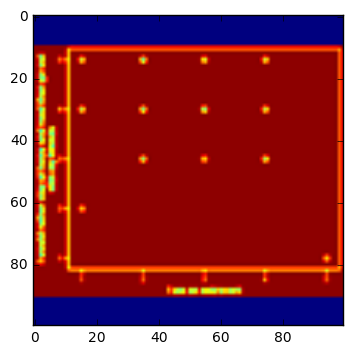

In [21]:
plt.imshow(ftrain_dataset[125,:,:])

In [22]:
ftrain_labels[125]

8.0

In [23]:
pickle_file = 'dataset_labels100by100.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'train_dataset': ftrain_dataset,
    'train_labels': ftrain_labels,
   # 'valid_dataset': fvalid_dataset,
   # 'valid_labels': fvalid_labels,
    'test_dataset': ftest_dataset,
    'test_labels': ftest_labels,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise